# Hashcode 18: Self-driving cars

Download the datasets from [here](https://storage.googleapis.com/coding-competitions-staging.appspot.com/HC/2018/qualification_round_2018.in.zip) and place them in the same directory as this notebook.
You can find the problem description [here](https://storage.googleapis.com/coding-competitions-staging.appspot.com/HC/2018/hashcode2018_qualification_task.pdf)

You can choose the data set to chose by changing DATASET_NAME constant.

In [3]:
DATASET_NAME = 'cars_datasets/b_should_be_easy'

## Import necessary libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

## Parse input file

In [5]:
input_df = pd.read_csv(DATASET_NAME + '.in', sep=' ', header=None)
R, C, F, N, B, T = input_df.iloc[0]
print('R:' + str(R), 'C:' + str(C), 'F: ' + str(F), 'N:' + str(N), 'B: ' + str(B), 'T:' + str(T))
rides = input_df.iloc[1:]
rides = rides.reset_index(drop=True)
rides.columns = ['a', 'b', 'x', 'y', 's', 'f']
rides = rides.assign(d = lambda ride: abs(ride.x - ride.a) + abs(ride.y - ride.b))
rides.sort_values('d', ascending=False).head()
# rides.head()

R:800 C:1000 F: 100 N:300 B: 25 T:25000


,a,b,x,y,s,f,d
213,705,938,38,142,7150,10756,1463
242,544,27,50,758,18105,20470,1225
33,434,885,25,81,406,2463,1213
271,715,879,347,44,11544,14794,1203
259,70,960,521,212,3311,5812,1199


In [6]:
print('Mean trips by car', N/F)
print('Max bonus', B * N)
print('Mean distance by car', 577.660000 * N / F, 577.660000 * N / F * 3)


Mean trips by car 3.0
Max bonus 7500
Mean distance by car 1732.98 5198.9400000000005


## Inspect dataset


This can be useful to identify patterns in the data.

In [7]:
rides.describe()

,a,b,x,y,s,f,d
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,395.373333,491.183333,402.203333,528.686667,12569.106667,13816.793333,577.660000
std,213.355876,286.322426,226.508711,291.127726,7115.669943,7090.225140,282.441229
min,3.000000,1.000000,5.000000,3.000000,186.000000,656.000000,32.000000
25%,222.000000,237.500000,200.250000,285.000000,6379.250000,7488.250000,376.750000
50%,400.000000,497.500000,409.000000,530.000000,12721.000000,14151.500000,560.000000
75%,581.250000,718.000000,594.250000,802.750000,18713.750000,20368.000000,780.750000
max,795.000000,985.000000,799.000000,997.000000,24453.000000,24999.000000,1463.000000


### Origins (a, b) and destinations (x,y)

This can provide information of busy areas and rides to discard by their origin/destination.

(0, 1000)

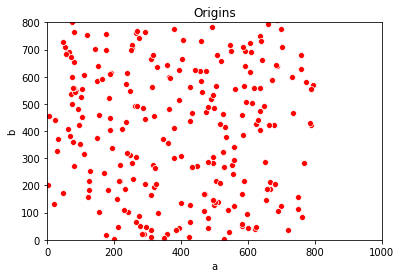

In [8]:
g = sns.scatterplot(rides.a, rides.b, color='red')
g.set_title('Origins')
axes = g.axes
axes.set_ylim(0,R)
axes.set_xlim(0,C)

(0, 1000)

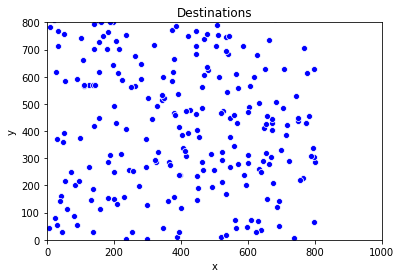

In [9]:
g = sns.scatterplot(rides.x, rides.y, color='blue')
g.set_title('Destinations')
axes = g.axes
axes.set_ylim(0,R)
axes.set_xlim(0,C)

Depending on the data distribution a complete area can be discarded from the algorithm.

### Distance (d)

Since the scoring is proportional to the distance, it is interesting to understand which is the distribution. 

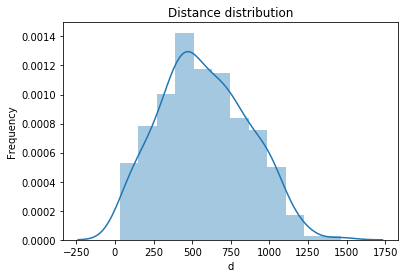

In [10]:
g = sns.distplot(rides.d);
g.set_title('Distance distribution');
g.set_ylabel('Frequency');

In order to simplify the algorithm, it may be interesting to discard rides by their distance. For example, by choosing a value of min and maximum distance that we want to include in the algorithm.

### Time to consider a ride

Since not all rides occur at the same time, there is a time span in which each rides has to be taken into account.

The time to start to consider a ride (tc), will be the step in which a vehicle can still reach from the maximum distance in the map. In our retangular map the maximum lead time will be equivalent to the diagonal.

In [11]:
L = R + C
# L = 3135 + 1375

rides['tc'] = rides.apply(lambda r: r.s - L, axis=1)
rides.sort_values('tc')

,a,b,x,y,s,f,d,tc
221,518,656,201,494,186,712,479,-1614
216,666,188,504,995,208,2340,969,-1592
167,502,138,42,160,228,1244,482,-1572
0,395,43,296,955,244,3620,1011,-1556
234,662,421,314,445,281,656,372,-1519
36,623,425,588,906,288,1239,516,-1512
180,558,292,107,920,330,2387,1079,-1470
33,434,885,25,81,406,2463,1213,-1394
179,624,916,777,613,450,1603,456,-1350
65,432,467,693,143,462,1451,585,-1338


On the other side, the moment from which for sure the ride should not be taken into account its latest finish (f). Better approximations can be done in this case.

In [12]:
bucket_size = 100
steps = np.arange(0, T, bucket_size)
rides_per_step = []
for step in steps:
    rides_to_consider = rides[(rides.tc <= step) & (rides.f > step)]
    rides_per_step.append(len(rides_to_consider))

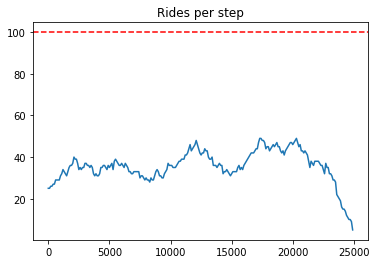

In [13]:
g = sns.lineplot(x=steps, y=rides_per_step);
g.set_title('Rides per step');
g.axes.axhline(F, ls='--', color='r');

The rides per step will condition on the algorithm we choose and its performance.

### Total score available

This may not be an achievable score, but it will represent how close of the maximum score we are.

In [14]:
max_scores = rides['d'] + B
max_scores.sum()

180798